# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In this project, I will be following the PACE methodology, starting with the "Plan" phase. My approach is as follows:

**Plan**
For this project, my plan includes the following steps:

**Data Exploration:** I will begin by reading in the data, reviewing the data dictionary, and exploring the dataset to identify key variables.

**Initial Data Inspection:** I will check for null values, identify any data quality issues, and assess key variables that are crucial to answering the business questions.
Key Questions to Address
The primary questions outlined in the project brief are:
- How many customers were there for each approach?
- What does the distribution of revenue look like overall, and how does it differ for each approach?
- Was there any difference in revenue trends over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.

**Next Steps**
After ensuring the dataset is clean and key variables are identified, I will perform analyses to address the above questions and provide recommendations based on the findings.

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
df = pd.read_csv("product_sales.csv")
print("-------------------------")
print(df.head(10))
print("-------------------------")
print(df.isnull().any())
print("-------------------------")
print(df.isnull().sum())
print("-------------------------")
print(df.info())
print("-------------------------")
print(df.describe())

-------------------------
   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   
5     6          Call  6489e678-40f2-4fed-a48e-d0dff9c09205       13    65.01   
6     4         Email  eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94       11   113.38   
7     1         Email  047df079-071b-4380-9012-2bfe9bce45d5       10    99.94   
8     5         Email  771586bd-7b64-40be-87df-afe884d2af9e       11   108.34   
9     5          Call  56491dae-bbe7-49f0-a651-b823a01103d8       11    53.82   

   years_as_customer  nb_site_visits          state  
0                  0        

In [99]:
# Just checked this column to see is there anything wrong
print(df["state"].value_counts())

California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode Islan

1. Each row represents a customer’s shopping activity. If we look at the columns step by step, here are the column names and their meanings:
- week: The week the sale was made, counted as weeks since the product launch.
- sales_method: Categorical, indicates which of the three sales methods was used for that customer.
- customer_id: Categorical, a unique identifier for each customer.
- nb_sold: Numeric, the number of new products sold.
- revenue: Numeric, revenue from the sales, rounded to 2 decimal places.
- years_as_customer: Numeric, the number of years the customer has been buying from us (company founded in 1984).
- nb_site_visits: Numeric, the number of times the customer has visited our website in the last 6 months.
- state: Categorical, the location of the customer, representing where orders are shipped.

In light of this information, let’s continue.

2. The dataset has 3 types of data: int64, object, and float64. The dataset contains a total of 15,000 rows. However, only the revenue column has missing values, with 1,074 missing entries.

3. After describing the numeric values, it’s evident that the range between values is not very wide. For instance, the maximum week is 6, the minimum is 1, and the mean is 3.10. On the other hand, the maximum revenue is 238.32, the minimum is 32.54, and the mean is 93.93. However, in the years_as_customer column (number of years the customer has been buying from us), the maximum value is 63, which is a significant outlier. But it might be true data so I'm not gonna change that.

Since there are a lot of null revenue values (1074), my first step is to find a way to handle them. If the percentage of null values were 5% or less, I would simply drop them, but since it's around 7%, I need to be more careful. My plan is to first check the 'nb_sold' values where the revenue is null. If the 'nb_sold' numbers are low, I’ll consider dropping those rows. Otherwise, I might fill the missing values using the mean/median, or treat the nulls as a separate category in the analysis.

In [100]:
null_nb_sold = df[df["revenue"].isnull()]
print("Sum of Null Nb Sold:", null_nb_sold["nb_sold"].sum())
print("Mean of Null Nb Sold:", null_nb_sold["nb_sold"].mean())
print("Median of Null Nb Sold:", null_nb_sold["nb_sold"].median())
print("Mean of Null Revenue:", null_nb_sold["revenue"].mean())
print("Median of Null Revenue:", null_nb_sold["revenue"].median())
print("-------------------------")
non_null_nb_sold = df[df["revenue"].notnull()]
print("Sum of Non-Null Nb Sold:", non_null_nb_sold["nb_sold"].sum())
print("Mean of Non-Null Nb Sold:", non_null_nb_sold["nb_sold"].mean())
print("Median of Non-Null Nb Sold:", non_null_nb_sold["nb_sold"].median())
print("Mean of Notn-Null Revenue:", non_null_nb_sold["revenue"].mean())
print("Median of Non-Null Revenue:", non_null_nb_sold["revenue"].median())

Sum of Null Nb Sold: 11452
Mean of Null Nb Sold: 10.66294227188082
Median of Null Nb Sold: 10.0
Mean of Null Revenue: nan
Median of Null Revenue: nan
-------------------------
Sum of Non-Null Nb Sold: 139818
Mean of Non-Null Nb Sold: 10.040068935803532
Median of Non-Null Nb Sold: 10.0
Mean of Notn-Null Revenue: 93.93494255349705
Median of Non-Null Revenue: 89.5


Based on this information, I believe the best way to handle the null values is by using the median revenue for those null values. Let me explain:

The null values correspond to 1,074 rows, which account for about 7% of the total data, thats why I can't drop them (its more than %5). These rows represent sales by customer. On the other hand, the non-null values correspond to 13,926 rows, which also represent the number of sells by customer

When we look at the ratios between the number of sales (nb_sold) for null rows and non-null rows, the ratios are very close. The ratio for null rows is 10.66, while for non-null rows, it’s 10.04. Interestingly, the median value for nb_sold is the same for both groups: 10.

Therefore, I’ve decided to fill the null revenue values with the median revenue of the non-null values, as this approach aligns well with the overall data distribution.

In [101]:
df["revenue"] = df["revenue"].fillna(df["revenue"].median())
df.isnull().any()

week                 False
sales_method         False
customer_id          False
nb_sold              False
revenue              False
years_as_customer    False
nb_site_visits       False
state                False
dtype: bool

Now, let's start with the project briefs.

**_QUESTION 1:_**
- How many customers were there for each approach?

In [102]:
customer_approach_count = df["sales_method"].value_counts()
customer_approach_count

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

According to the data, most of the sales were made using the Email method with 7,456 sales. The second method is Call with 4,962 sales, and the third is Email + Call with 2,549 sales. However, in this approach count table, some sales methods are written incorrectly. In the sales_method column, there should be only three different method types: Email, Call, and Email + Call. But in the data, some methods are misspelled. For example, there are 23 sales under “em + call” and 10 sales under “email.” These methods are just spelling errors, and I need to merge them back together correctly.

In [103]:
# Corrected column names
df["sales_method"] = df["sales_method"].replace({
    "em + call": "Email + Call",
    "email": "Email"
})

In [104]:
# Number of rows (sales) by sales method. Not revenue.
customer_approach_count = df["sales_method"].value_counts().reset_index()
customer_approach_count.columns = ["sales_method", "count"]
print(customer_approach_count)
percentage_sales = customer_approach_count["count"] * 100 / 15000
print(percentage_sales)

   sales_method  count
0         Email   7466
1          Call   4962
2  Email + Call   2572
0    49.773333
1    33.080000
2    17.146667
Name: count, dtype: float64


But as a nb_sold values, its much more different than revenue and row count plot.

In [105]:
# Nb_sold by methods as sum and percentage of data
nb_sold_by_method = df.groupby(["sales_method", "week"]).sum().reset_index()

nb_sold_by_method_sum = nb_sold_by_method.groupby("sales_method")["nb_sold"].sum()
print(nb_sold_by_method_sum)
print("-------------------------")
nb_sold_by_method_percentage = nb_sold_by_method_sum / nb_sold_by_method_sum.sum() * 100
print(nb_sold_by_method_percentage)

sales_method
Call            47187
Email           72639
Email + Call    31444
Name: nb_sold, dtype: int64
-------------------------
sales_method
Call            31.193892
Email           48.019435
Email + Call    20.786673
Name: nb_sold, dtype: float64


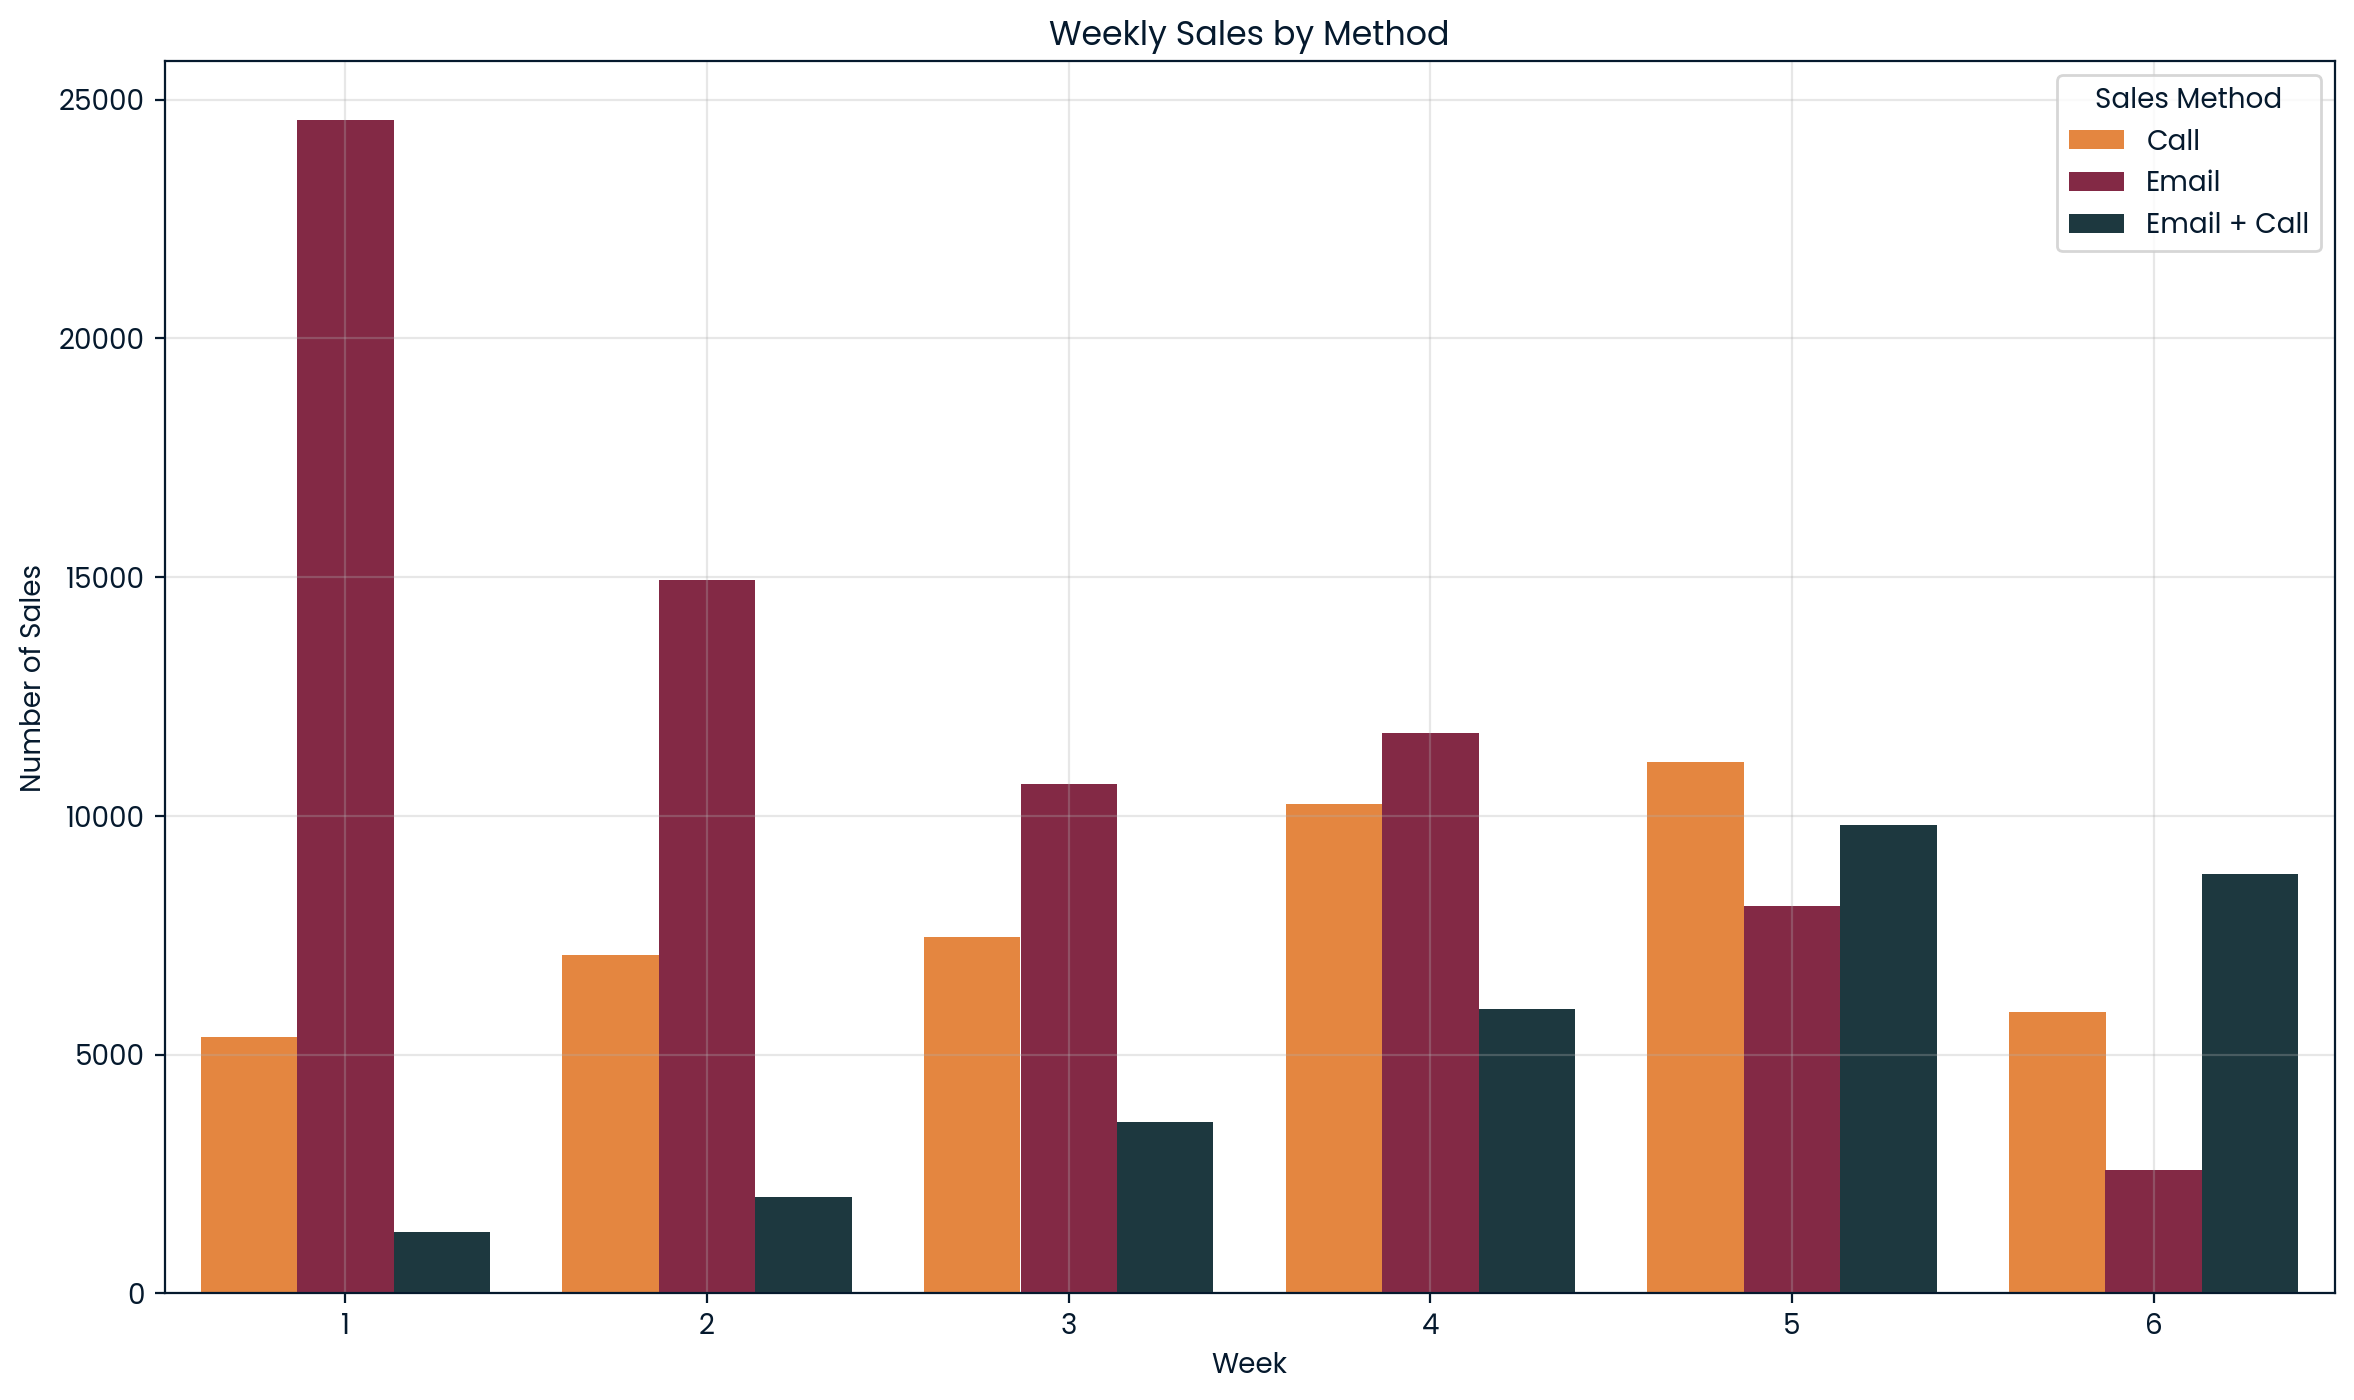

In [106]:
# Nb_Sold barplot
plt.figure(figsize=(14, 8))
sns.barplot(data=nb_sold_by_method, x="week", y="nb_sold", hue="sales_method", palette=["#FF8225", "#921A40", "#173B45"], dodge=True)

plt.xlabel("Week")
plt.ylabel("Number of Sales")
plt.title("Weekly Sales by Method")
plt.legend(title="Sales Method")
plt.grid(True, alpha=0.3)
plt.show()

It looks like most sales were made through the Email method, while the Email + Call method has the lowest number of sales. But is that also true in terms of revenue? That’s the second question of this project.

**_QUESTION 2:_**
What does the distribution of revenue look like overall, and how does it differ for each approach?

In [107]:
# To see percentage of sale methods as revenue
grouped_method_revenue = df.groupby("sales_method")["revenue"].sum()
print(grouped_method_revenue)
print("-------------------------")
percentage_revenue = grouped_method_revenue / grouped_method_revenue.sum() * 100
print(percentage_revenue)

sales_method
Call            243762.99
Email           721005.83
Email + Call    439492.19
Name: revenue, dtype: float64
-------------------------
sales_method
Call            17.358809
Email           51.344146
Email + Call    31.297044
Name: revenue, dtype: float64


According to the revenue data, it appears that most of the revenue was generated through the Email sales method. By method:

- Email revenue is $721,005.83, representing 51.34% of the total revenue.
- Call revenue is $243,762.99, representing 17.35% of the total revenue.
- Email + Call revenue is $439,492.19, representing 31.29% of the total revenue.
 
However, understanding what these revenues and percentages mean is much more important.

If we look at the percentages of sales methods:

- Email: 49.77%
- Call: 33.08%
- Email + Call: 17.14%

In this case, we see that the Email revenue percentage and sales percentage are quite close. However, while 33.08% of sales were made using the Call method, the revenue generated from Call only accounts for 17.39% of the total. On the other hand, while Email + Call is at the bottom in terms of sales percentage, its revenue represents 31.20% of the total revenue, which is almost double that of the Call method. Therefore, I will check how much time is spent on each method and whether it is worth using Call more than Email + Call by the end of this project. For now, let's continue with the next question.

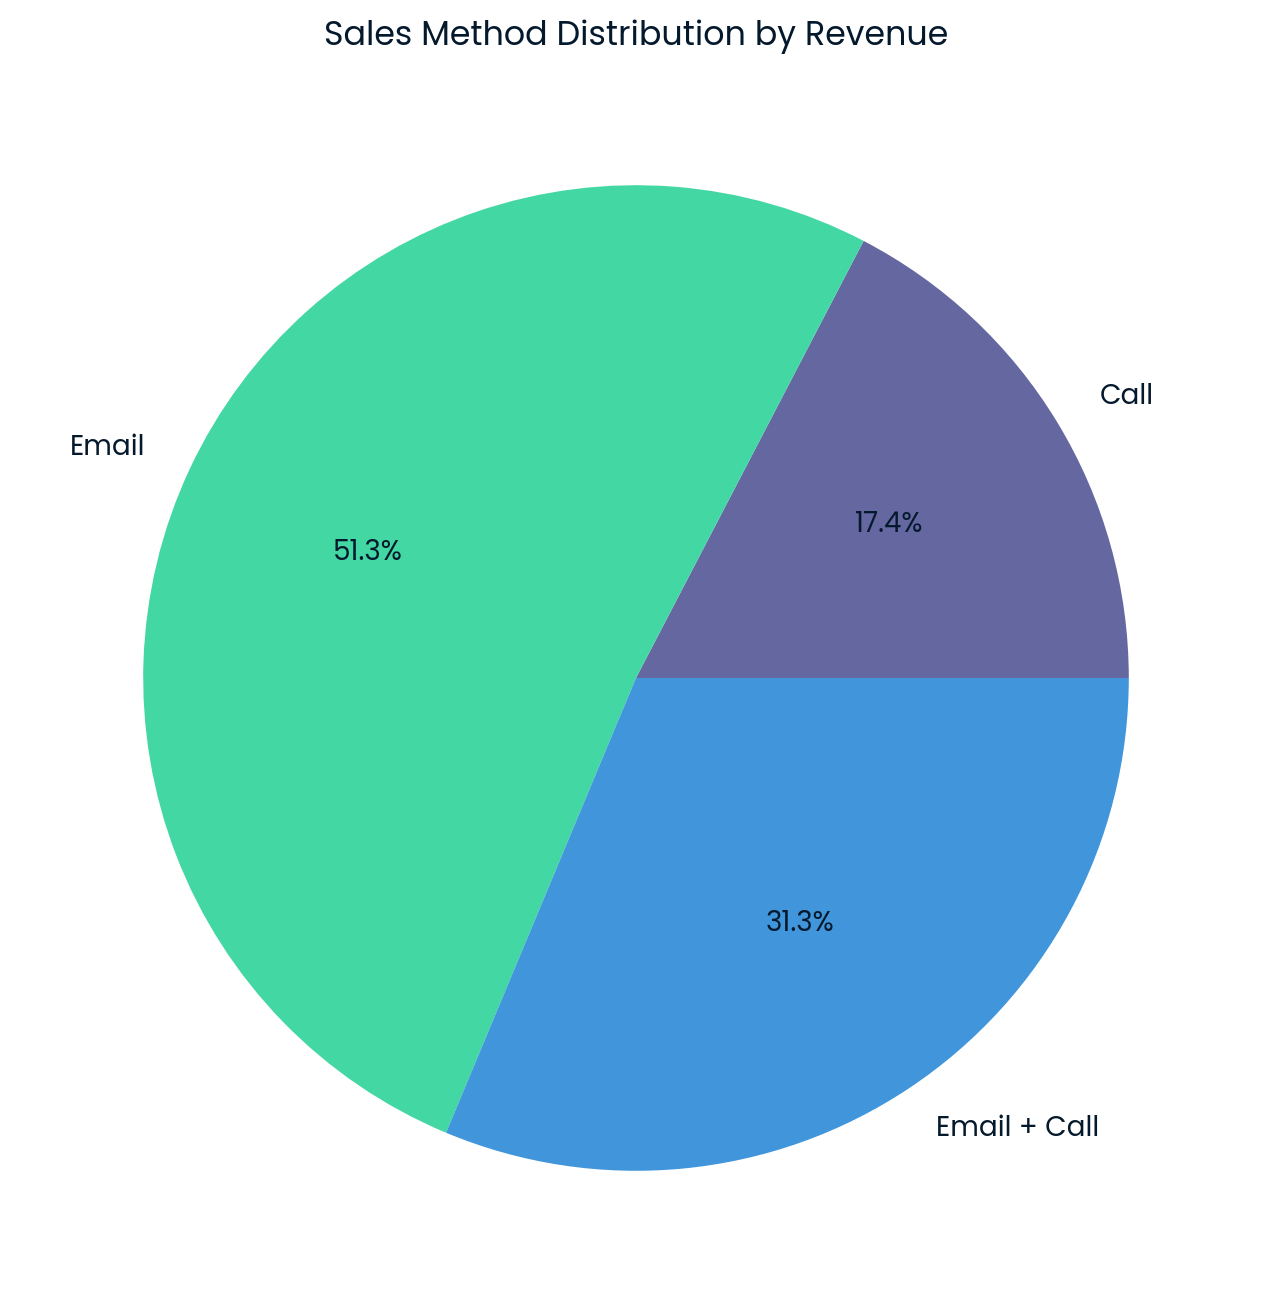

In [108]:
# Pie-chart
plt.figure(figsize=(14,8))
labels = ["Call", "Email", "Email + Call"]
plt.pie(percentage_revenue, labels=labels, autopct="%1.1f%%")
plt.title("Sales Method Distribution by Revenue")
plt.show()

**_QUESTION 3:_**
- Was there any difference in revenue trends over time for each of the methods?

In [109]:
over_time_each_methods = df.groupby(["sales_method", "week"]).sum().reset_index()
over_time_each_methods

,sales_method,week,nb_sold,revenue,years_as_customer,nb_site_visits
0,Call,1,5366,27770.18,4624,16290
1,Call,2,7088,36477.02,4349,19198
2,Call,3,7456,39290.27,4934,20682
3,Call,4,10259,53263.49,4869,25596
4,Call,5,11129,56829.61,5049,27012
5,Call,6,5889,30132.42,1862,12413
6,Email,1,24573,246681.05,15134,66330
7,Email,2,14952,147647.07,7069,37398
8,Email,3,10678,106399.64,5901,27993
9,Email,4,11736,115395.87,4944,28084


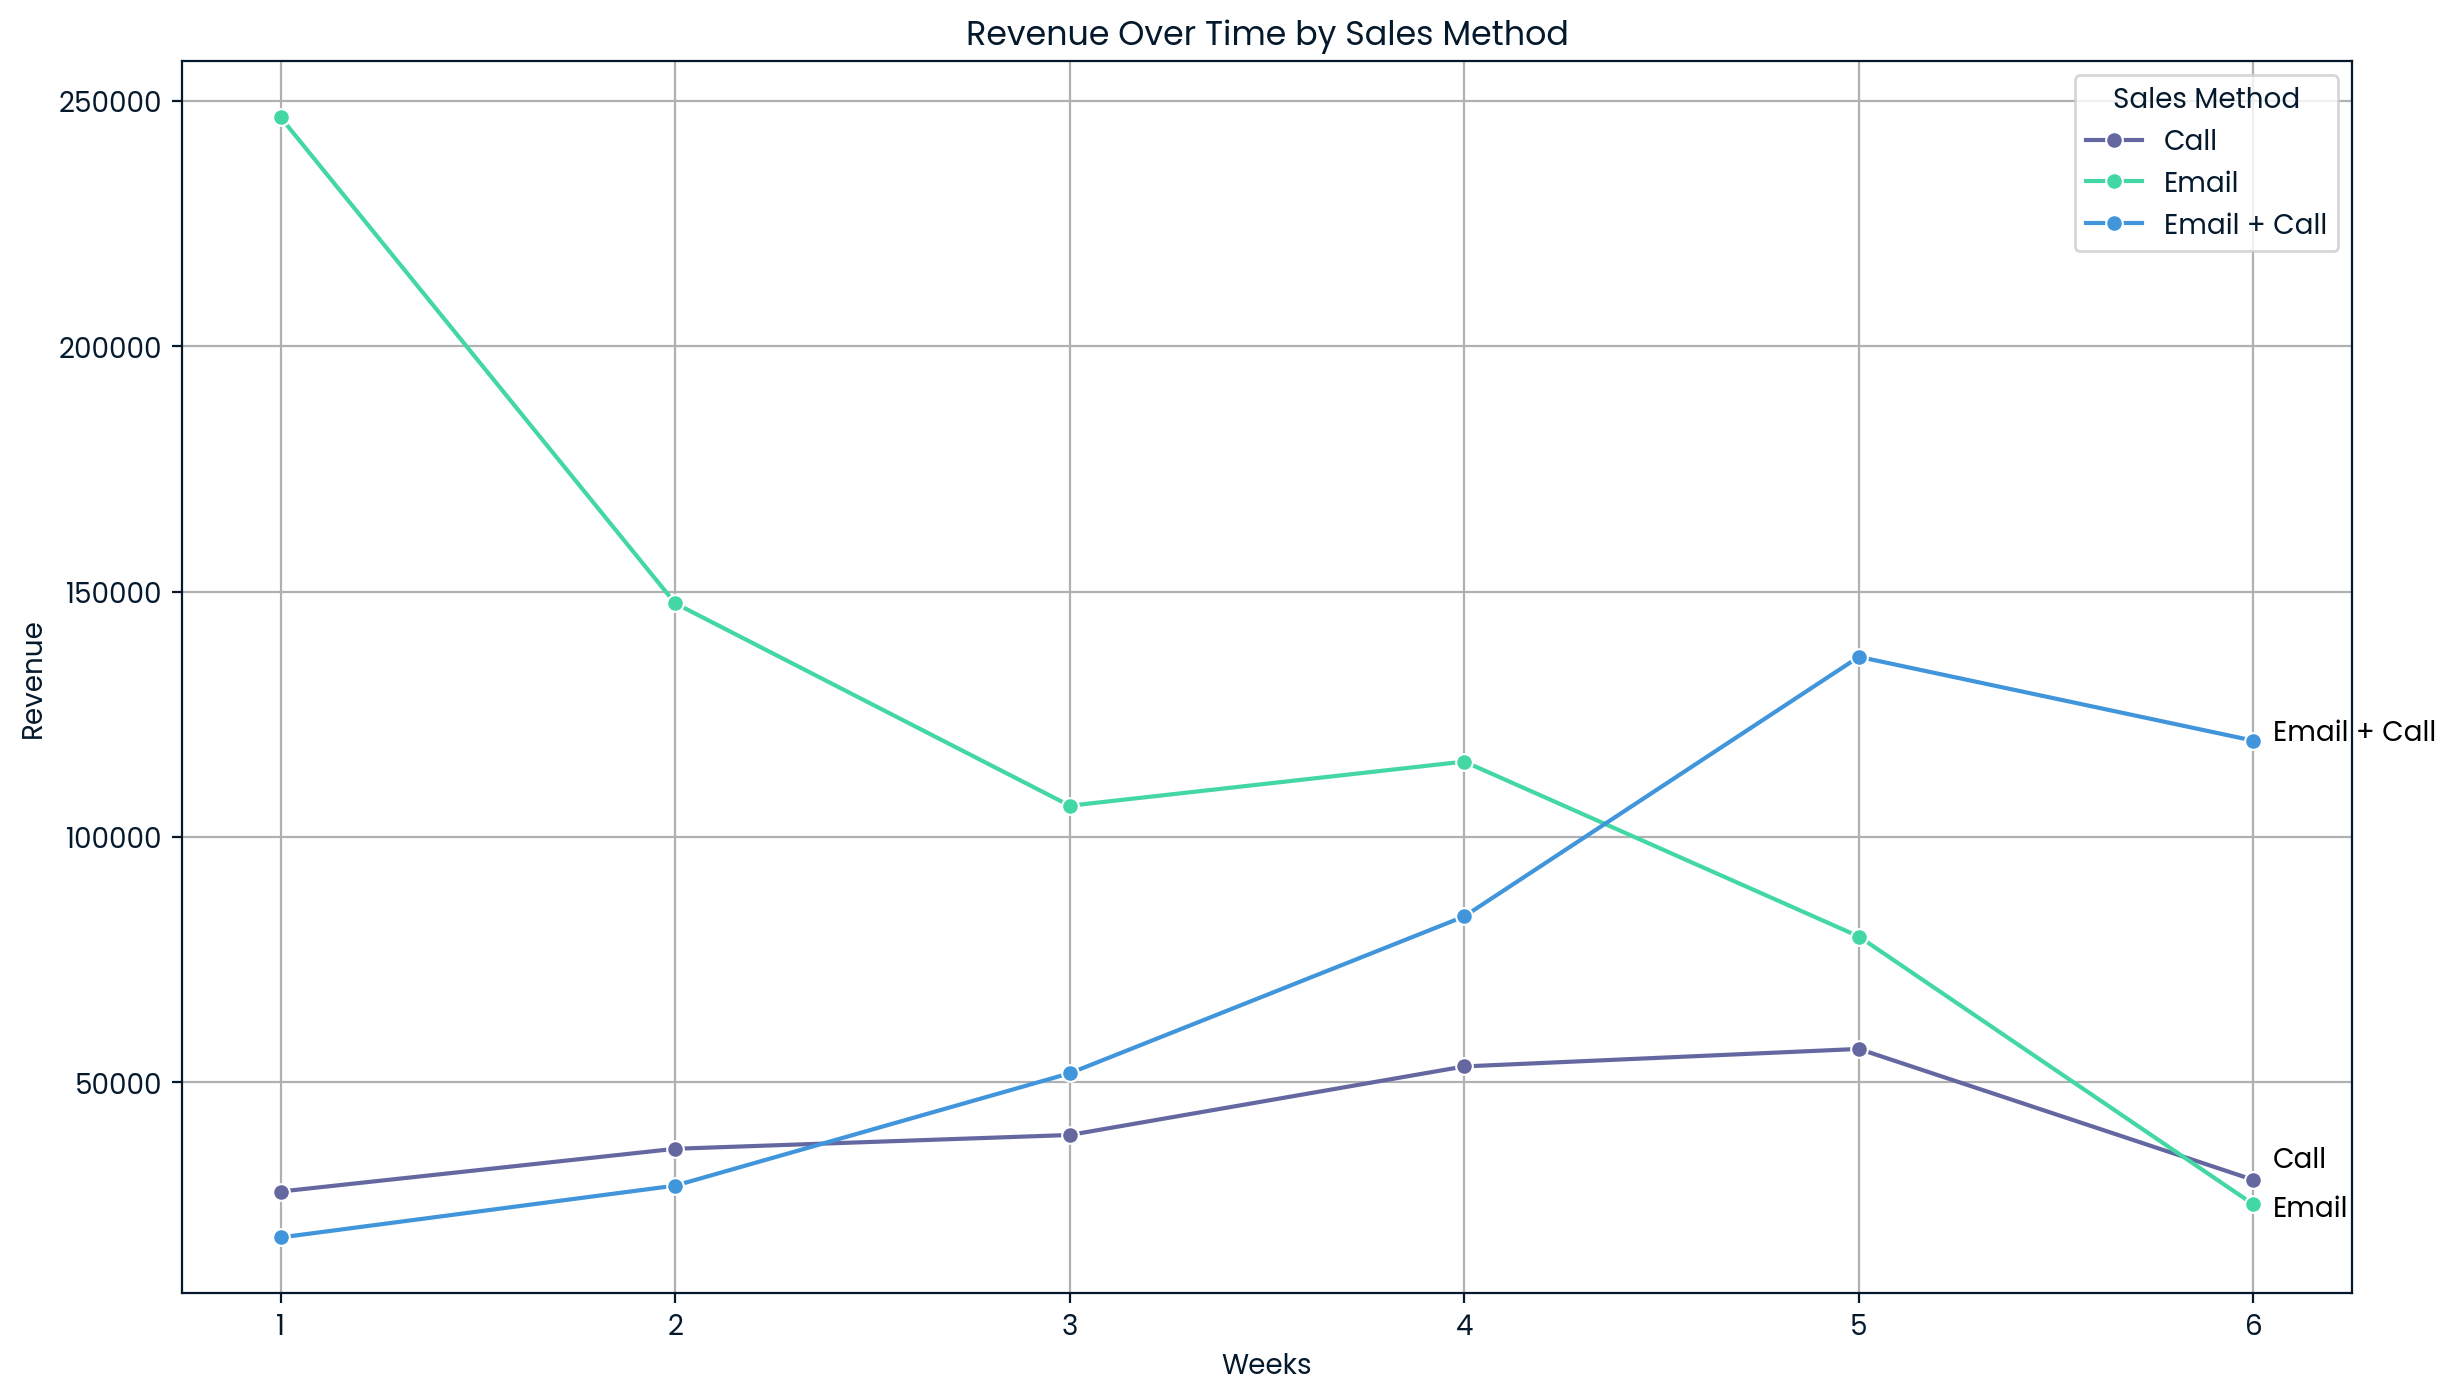

In [110]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=over_time_each_methods, x="week", y="revenue", hue="sales_method", marker="o")

plt.title("Revenue Over Time by Sales Method")
plt.legend(title="Sales Method")
plt.xlabel("Weeks")
plt.ylabel("Revenue")
plt.grid(True)

for method in over_time_each_methods["sales_method"].unique():
    data = over_time_each_methods[over_time_each_methods["sales_method"] == method]
    y_position = data["revenue"].iloc[-1]
    if method == "Call":
        y_position += 2500
    elif method == "Email":
        y_position -= 2500

    plt.text(
        data["week"].max() + 0.05,
        y_position,
        method,
        horizontalalignment="left",
        size="medium",
        color="black")

plt.show()

According to the week/revenue plot, it seems that the Call method is the worst option because its revenue is almost consistently the lowest across all weeks. On the other hand, the Email method starts strong at the top but then decreases almost every week (except week 4, but it’s very close to the last week). Interestingly, when the Email method starts to decline around week 4, the Email + Call method peaks.

From a customer behavior perspective, this might be because most customers check their emails first and make purchases if they’re interested. However, as weeks pass, they start to forget, so they need a reminder via a call to re-engage them with the company, products, and prices. It seems that week 4 is when both the Email and Email + Call methods converge.

In conclusion, the Email method is the most effective for the first 4 weeks. However, as customers begin to forget about the product, the Email + Call method becomes the most effective after 4-5 weeks. Meanwhile, the Call method remains largely ineffective throughout.

But the key question is: If people start forgetting after a few weeks, why doesn’t the Call method alone work? Why does the Email + Call combination perform better than just Call? To analyze that, let’s continue to the next and final question.

**_QUESTION 4:_**
- Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.

To answer this question, first, we need to check how much time is spent on each method. According to the Practical Exam - Product Sales file, it says:

**New Product Sales Methods**

Six weeks ago we launched a new line of office stationery. Despite the world becoming
increasingly digital, there is still demand for notebooks, pens and sticky notes.
Our focus has been on selling products to enable our customers to be more creative, focused
on tools for brainstorming. We have tested three different sales strategies for this, targeted
email and phone calls, as well as combining the two.
- Email: Customers in this group received an email when the product line was launched, and a
further email three weeks later. This required very little work for the team.
- Call: Customers in this group were called by a member of the sales team. On average
members of the team were on the phone for around thirty minutes per customer.
- Email and call: Customers in this group were first sent the product information email, then
called a week later by the sales team to talk about their needs and how this new product
may support their work. The email required little work from the team, the call was around ten
minutes per customer.

First, identify the key points from the method details:
- When the product line is launched, customers receive an email, followed by another one three weeks later. This explains the increase in email revenue during the fourth week. Additionally, this method requires very little effort from the team.
- The call method requires around 30 minutes per customer.
- The Email and Call method starts similarly to the email method but differs in that the sales team contacts customers one week later to understand their needs and how the new product might support their work. The email portion requires minimal effort, and the follow-up calls last around 10 minutes, which is three times shorter than the regular call method.

Regarding question 4, the call method is obviously the worst. It takes so much time and is just slightly better than the email + call method in the first two weeks and only a bit better than the email method in the last week. But the sales team has to talk to customers for 30 minutes, which is three times more than the email + call method, and much, much more than the email-only method.

So, my recommendation is that since email doesn't require much effort, we should use both the email and email + call methods and stop using the call-only method. It takes too much time and only accounts for 17.35% of total revenue.

On the other hand, in light of the revenue line plot by sales method, we see that email revenue decreases every week (except in week 4, because the sales team sent emails again in week 3). Eventually, after six weeks, it finishes just slightly below the call method. However, while email revenue decreases, email + call revenue increases every week (except in week 6). So, when one method’s performance is decreasing, switching to the other, which is increasing, might be a perfect strategy.

**Summary:**

First, I read the data and explored the dataset, variables, and values. There were 1,074 null values in the revenue column, which accounted for 7% of the data (above the 5% threshold). Therefore, I decided to replace the null values with the median revenue. Some sales methods were mislabeled, so I corrected them. In other columns, I didn’t find anything unusual except for one customer who has been with us for 63 years. This might be accurate, so I left it unchanged.

Regarding the questions and the general analysis of this data:

- _**Email method:**_ Total sales by customer (rows): 7,466, total products sold: 72,639, total revenue: $721,005.83.
- **Percentages:** Sales by customer: 49.77%, products sold: 48.01%, revenue: 51.34%.
- **Summary:** The Email method ranks highest in terms of customer count, products sold, and revenue. The percentages are close to each other.

- _**Call method:**_ Total sales by customer (rows): 4,962, total products sold: 47,187, total revenue: $243,762.99.
- **Percentages:** Sales by customer: 33.08%, products sold: 31.19%, revenue: 17.35%.
- **Summary:** Although this method reaches more customers and sells more products, the revenue is significantly lower compared to the other methods. This suggests customers are purchasing cheaper products with this method.

- _**Email + Call method:**_ Total sales by customer (rows): 2,572, total products sold: 31,444, total revenue: $439,492.19.
- **Percentages:** Sales by customer: 17.14%, products sold: 20.78%, revenue: 31.29%.
- **Summary:** Although this method serves fewer customers and sells fewer products (ranking last compared to other methods), it generates almost twice the revenue of the Call method. This indicates that customers tend to purchase more expensive products through this method, even with fewer sales.

**Recommendation:**

So regarding my assumption before, if customers start to forget about products a week after, and if that’s why the Email + Call method starts to increase because the sales team reminds them about the products, then why doesn’t the Call method work the same way?

For the Email method, after 3 weeks, the sales team sends another email about the products, which is why email sales increase slightly in week 4. But as for why the Call method doesn’t work, it might be because customers want to see the products while they’re talking. Looking at the products and asking questions about them at the same time might be effective, and it doesn’t take much time (only 10 minutes). However, the Call method doesn’t work like that. First, customers don’t have a catalog and can’t see the products or read the descriptions while talking with the sales team, which might cause misunderstandings. Also, it takes 30 minutes, which is a lot of time for both the sales teams and the customers.

So, my point is that yes, emails are very effective at first, but week after week, customers start to forget about the products and need to be reminded. That’s why the email sent in week 3 has a positive effect on week 4. In that case, the Email + Call method is a more useful approach to use after sending an email. This is because the Email method doesn’t require much effort or time. So it doesn’t hurt anyone, and on the contrary, sending an email initially and then following up with a call using the Email + Call method might make customers feel special. They can ask questions, and the sales team can understand what products they lack or what they need.

Given that the Email method requires less time and effort, I recommend discontinuing the Call method if possible. By focusing on the Email + Call method, we can reach more customers because, while the Call method requires 30 minutes per customer, the Email + Call method only takes 10 minutes. Even now, using all three methods, the Email + Call method’s revenue is nearly double that of the Call method. If we repurpose the time spent on the Call method for the Email + Call method, we could potentially triple its revenue, which might result in approximately $1,318,476.57—almost twice the revenue generated by the Email method within six weeks!